<a href="https://colab.research.google.com/github/ronil-tshah23/Impact-of-Marketing-Campaign-on-Product-Sales/blob/main/Impact_Analysis_of_Marketing_Campaigns_on_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To analyze how marketing spending across different channels (TV, Social Media, Email, etc.) influences product sales. Recommend which channel gives the highest ROI.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Advertising.csv")

       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


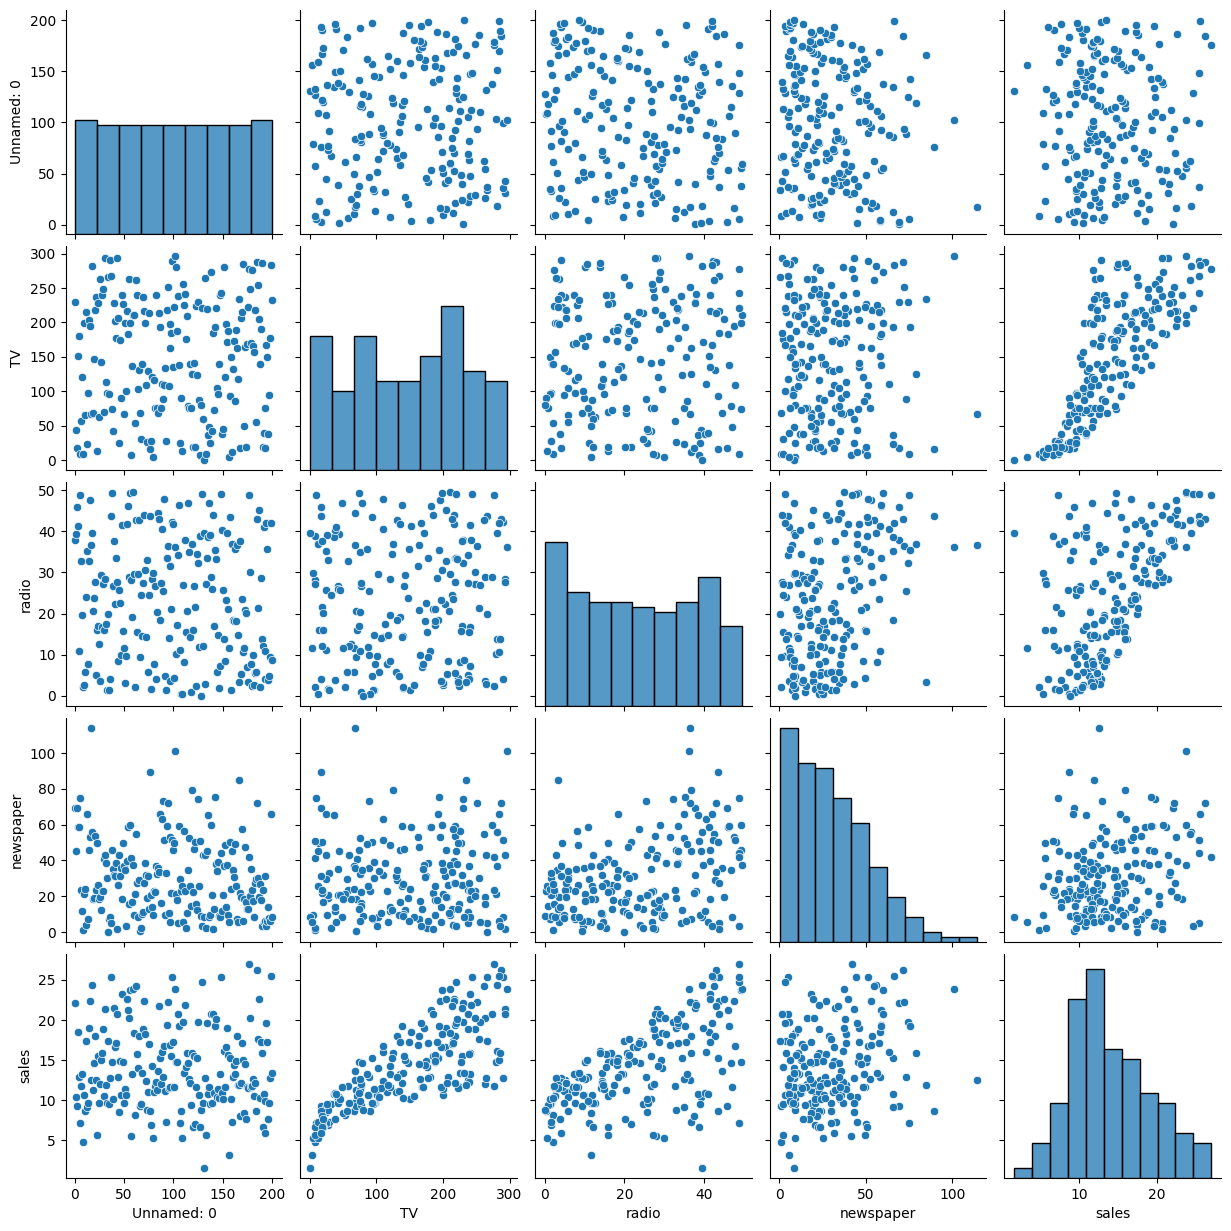

In [3]:
print(df.describe())
sns.pairplot(df)
plt.show()

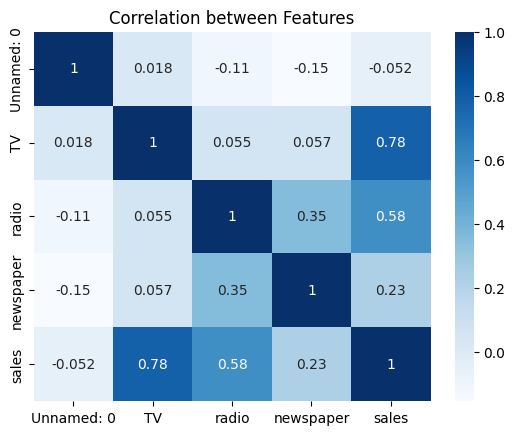

In [4]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation between Features")
plt.show()

In [6]:
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.58e-96
Time:                        11:09:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

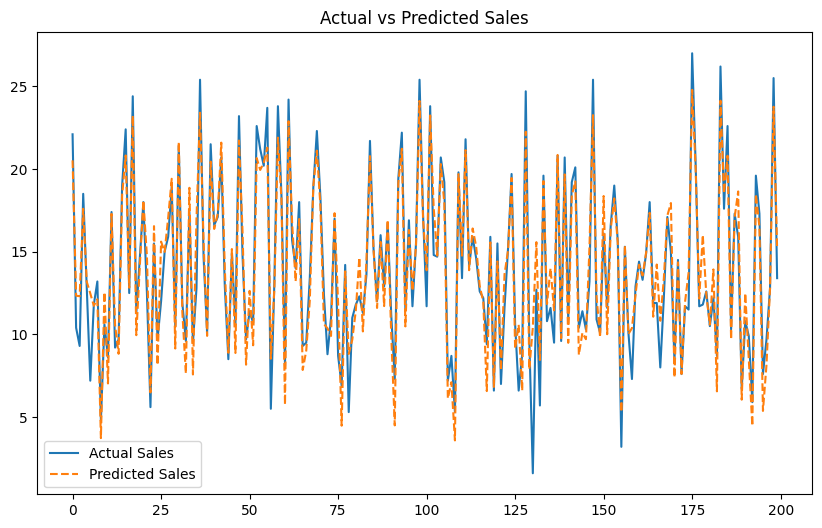

In [8]:
df["Predicted_Sales"] = model.predict(X)
plt.figure(figsize=(10,6))
plt.plot(df["sales"], label="Actual Sales")
plt.plot(df["Predicted_Sales"], label="Predicted Sales", linestyle='--')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

Conclusion Drawn:

TV advertising had the strongest positive correlation with sales.

Newspaper spend showed the weakest ROI; budget reallocation advised.

The regression model achieved an R² of ~0.89, indicating strong predictive power.

Recommendation: Increase TV and Radio budget, reduce Newspaper for higher efficiency.